In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ad = xr.open_dataset("./data/ad.nc")['ad']
ad_d = xr.open_dataset("./data/ad_d.nc")['ad_d']
ad.shape

(32, 13, 81)

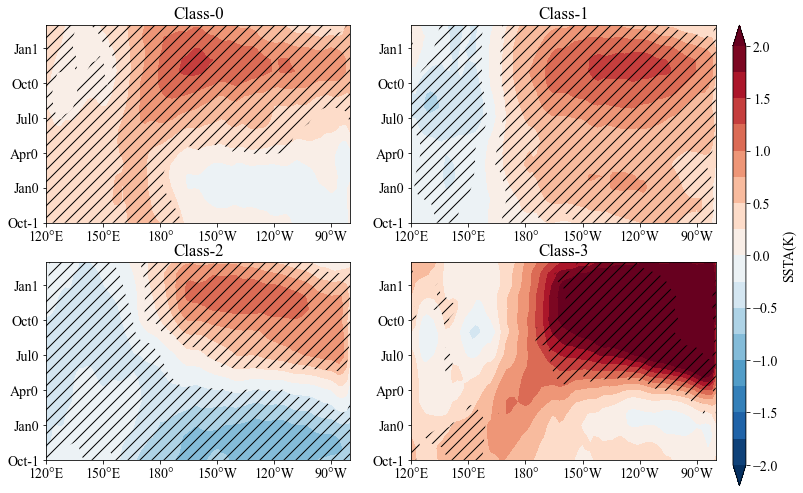

In [4]:
time_label = ["Oct-1", "Jan0", "Apr0", "Jul0", "Oct0"]
time_label1 = ["Oct-1", "Jan0", "Apr0", "Jul0", "Oct0", "Jan1"]
from sklearn.cluster import KMeans
import scipy.stats as sts
from cartopy.mpl.ticker import LongitudeFormatter

plt.rc('font', family='Times New Roman', size=14)
xp, yp = np.array(ad.lon), np.arange(18)
clus = 4
km_m = KMeans(n_clusters=clus, random_state=0).fit(np.array(ad).reshape(32,-1))
labels = km_m.labels_
ad_d1 = np.array(ad_d)
fig = plt.figure(figsize=(12, 8))
for clu in range(clus):

    add_clu = ad_d1[labels == clu]
    add_clu_mean = add_clu.mean(axis=0)
    p_v = sts.ttest_1samp(add_clu, np.zeros_like(add_clu_mean), axis=0).pvalue
    # 画图
    plt.subplot(2, 2, clu + 1)
    cm = plt.contourf(xp,
                      yp,
                      add_clu_mean,
                      cmap="RdBu_r",
                      levels=np.linspace(-2, 2, 17),
                      extend="both")
    plt.contourf(xp,
                 yp,
                 p_v,
                 hatches=['//', None],
                 colors="none",
                 levels=[0, 0.1, 1])
    plt.yticks(np.arange(0, 17, 3), time_label1)
    plt.xticks(xp[::15])
    plt.gca().xaxis.set_major_formatter(LongitudeFormatter())
    plt.title("Class-%s" % clu)
ax_cb = fig.add_axes([0.92, 0.08, 0.015, 0.80])
cb = fig.colorbar(cm,
                  cax=ax_cb,
                  orientation="vertical",
                  spacing="proportional")
cb.set_label("SSTA(K)")
# plt.tight_layout()
plt.savefig("./pic/k-means_re%s.png" % clus)
plt.show()

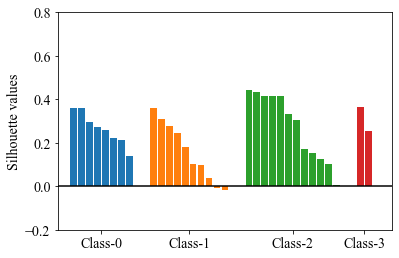

In [5]:
from sklearn.metrics import silhouette_score, silhouette_samples

scores = silhouette_samples(np.array(ad).reshape(32,-1), labels=labels)
ini_len = 0
fig = plt.figure(figsize=[6, 4])
ticks = []
for clu in range(clus):

    score_clas = scores[labels == clu]
    xbar = np.arange(score_clas.shape[0]) + ini_len
    ini_len = xbar.max() + 3
    plt.bar(xbar, np.sort(score_clas)[::-1],width=0.85)
    tick = (xbar.min()+xbar.max())/2
    ticks.append(tick)
plt.ylim(-0.2, 1)
plt.xticks(ticks,["Class-%s"%i for i in range(clus)])
plt.axhline(y=0,color="black")
plt.xlim(-2,40)
plt.ylim(-0.2,0.8)
plt.ylabel("Silhouette values")
plt.savefig("./pic/sc.png")